# **Developing a Loan Approval Model for GhanaConnect, a Non Banking Financial Institution**

### **Import the Neccessary Libraries**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

### **Import the Dataset**

In [2]:
df = pd.read_csv('c:\\users\\user\\desktop\\loan_borrower_data.csv')

# **Exploratory Data Analysis (EDA)**

### *Show First 5 Rows in the Dataset*

In [3]:
df.head(5)

,Credit_Policy,Purpose,Int_Rate,Installment,Log_Annual_Inc,Dti,Fico,Days_With_Cr_Line,Revol_Bal,Revol_Util,Inq_Last_6mths,Delinq_2yrs,Pub_Rec,Not_Fully_Paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


### *Show Last 5 Rows in the Dataset* 

In [4]:
df.tail(5)

,Credit_Policy,Purpose,Int_Rate,Installment,Log_Annual_Inc,Dti,Fico,Days_With_Cr_Line,Revol_Bal,Revol_Util,Inq_Last_6mths,Delinq_2yrs,Pub_Rec,Not_Fully_Paid
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1
9577,0,debt_consolidation,0.1392,853.43,11.264464,16.28,732,4740.000000,37879,57.0,6,0,0,1


### *Show Size of the Dataset*

### *Show the Number of Rows and the Number of Columns in the Dataset*

In [5]:
print('Number of Rows',df.shape[0])
print('Number of Columns',df.shape[1])

Number of Rows 9578
Number of Columns 14


### *Show all the Columns in the Dataset*

In [6]:
df.columns.tolist()

['Credit_Policy',
 'Purpose',
 'Int_Rate',
 'Installment',
 'Log_Annual_Inc',
 'Dti',
 'Fico',
 'Days_With_Cr_Line',
 'Revol_Bal',
 'Revol_Util',
 'Inq_Last_6mths',
 'Delinq_2yrs',
 'Pub_Rec',
 'Not_Fully_Paid']

### *Show the Datatypes of the Columns in the Dataset*

In [7]:
df.dtypes.tolist()

[dtype('int64'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64')]

### *Show Null Values in the Dataset*

In [8]:
df.isnull().sum()

Credit_Policy        0
Purpose              0
Int_Rate             0
Installment          0
Log_Annual_Inc       0
Dti                  0
Fico                 0
Days_With_Cr_Line    0
Revol_Bal            0
Revol_Util           0
Inq_Last_6mths       0
Delinq_2yrs          0
Pub_Rec              0
Not_Fully_Paid       0
dtype: int64

### *Show Duplicated Values in the Dataset*

In [9]:
df.duplicated().sum()

0

### *Show Information About the Dataset*

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Credit_Policy      9578 non-null   int64  
 1   Purpose            9578 non-null   object 
 2   Int_Rate           9578 non-null   float64
 3   Installment        9578 non-null   float64
 4   Log_Annual_Inc     9578 non-null   float64
 5   Dti                9578 non-null   float64
 6   Fico               9578 non-null   int64  
 7   Days_With_Cr_Line  9578 non-null   float64
 8   Revol_Bal          9578 non-null   int64  
 9   Revol_Util         9578 non-null   float64
 10  Inq_Last_6mths     9578 non-null   int64  
 11  Delinq_2yrs        9578 non-null   int64  
 12  Pub_Rec            9578 non-null   int64  
 13  Not_Fully_Paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


### *Show Overall Statistics About the Dataset*

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Credit_Policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
Int_Rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
Installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
Log_Annual_Inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
Dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
Fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
Days_With_Cr_Line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
Revol_Bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
Revol_Util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
Inq_Last_6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


### *Show Distribution of the Target Variable, Not_Fully_Paid*

In [12]:
Not_Fully_Paid = df['Not_Fully_Paid'].value_counts(normalize=True)

In [13]:
Not_Fully_Paid

Not_Fully_Paid
0    0.839946
1    0.160054
Name: proportion, dtype: float64

### Percentage representation of the Target Variable

In [14]:
pct = df['Not_Fully_Paid'].value_counts(normalize=True)*100
print("Percentage of Loans:")
print(f"Fully Paid (0): {pct[0]:.2f}%")
print(f"Fully Paid (1): {pct[1]:.2f}%")

Percentage of Loans:
Fully Paid (0): 83.99%
Fully Paid (1): 16.01%


### *Bar Chart Showing the Target Variable*

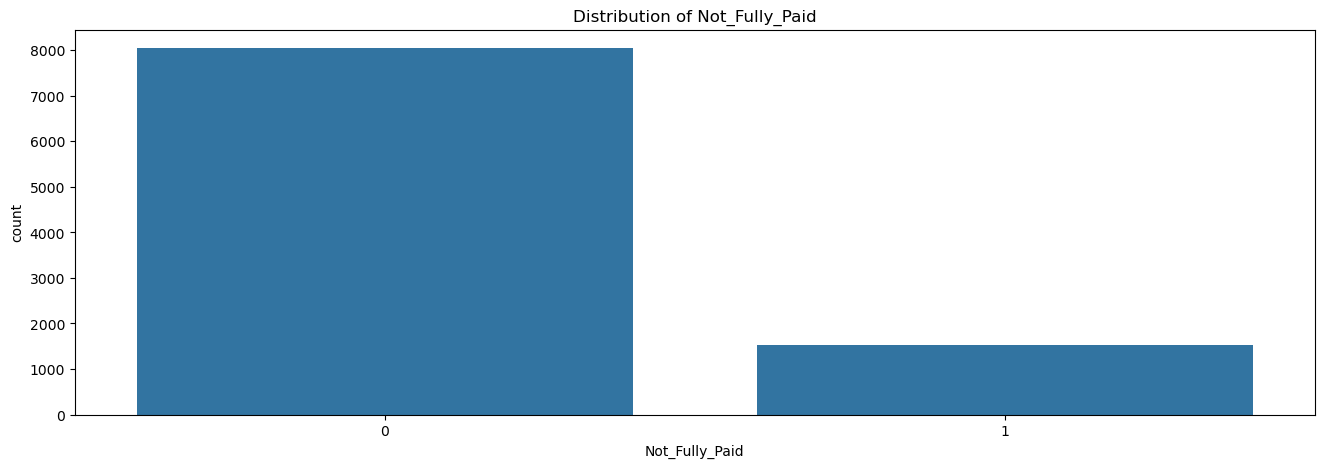

In [15]:
plt.figure(figsize=(16,5))
sns.countplot(data=df, x='Not_Fully_Paid')
plt.title('Distribution of Not_Fully_Paid')
plt.show()

### *Histograms for Numerical Features*

In [16]:
num_cols = ['Int_Rate','Installment','Log_Annual_Inc','Dti','Fico', 
            'Days_With_Cr_Line','Revol_Bal','Revol_Util','Inq_Last_6mths', 
            'Delinq_2yrs','Pub_Rec']

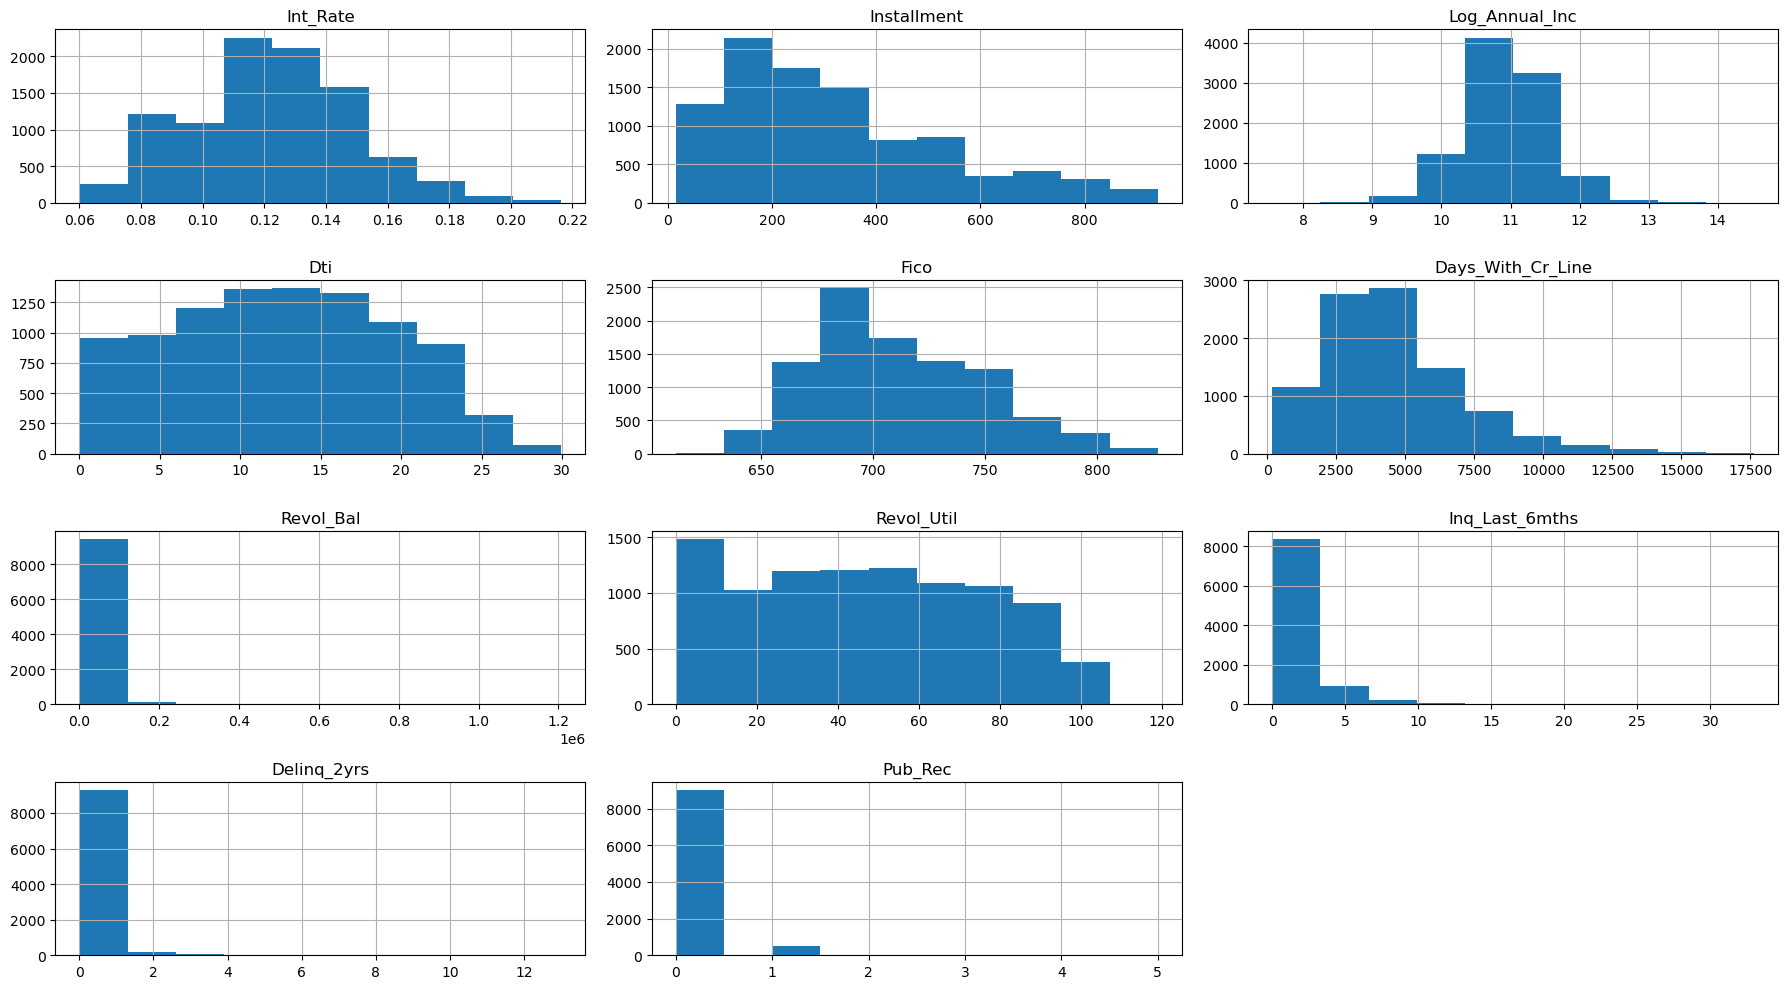

In [17]:
df[num_cols].hist(figsize=(18,10))
plt.tight_layout()
plt.show()

### *Boxplots to Identify Outliers in Numerical Features*

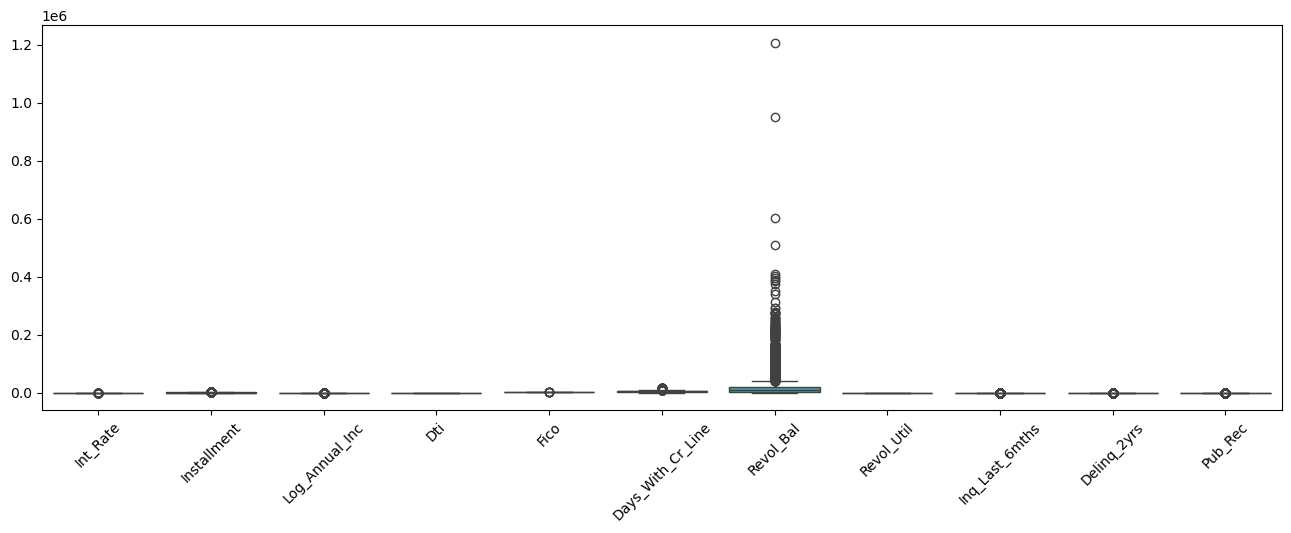

In [18]:
plt.figure(figsize=(16,5))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=45)
plt.show()

### *Count Plots for Categorical Features*

In [19]:
cat_cols = ['Credit_Policy', 'Purpose', 'Not_Fully_Paid']

### *Countplot Showing Categorical Features*

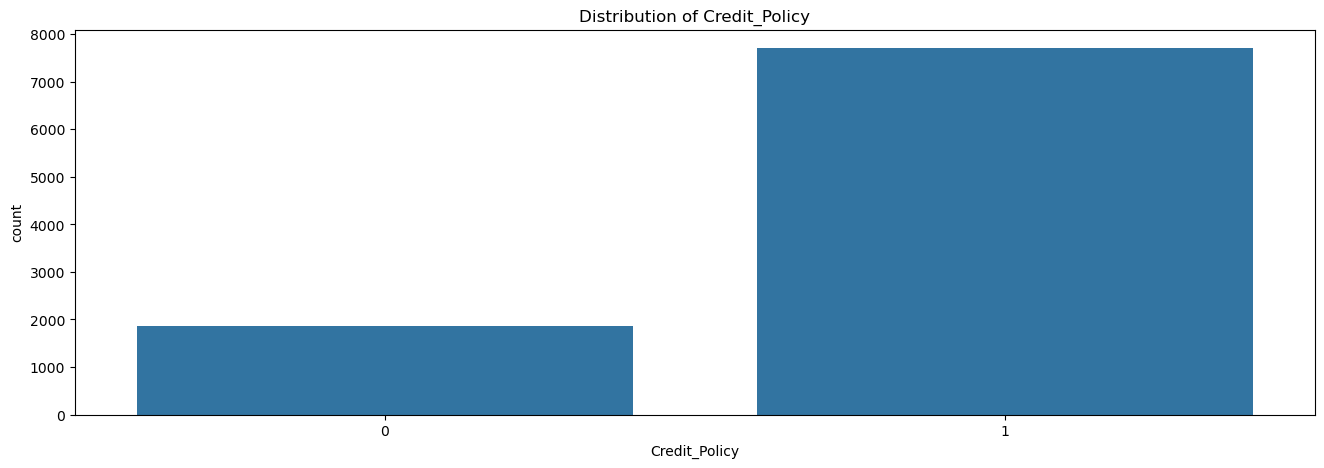

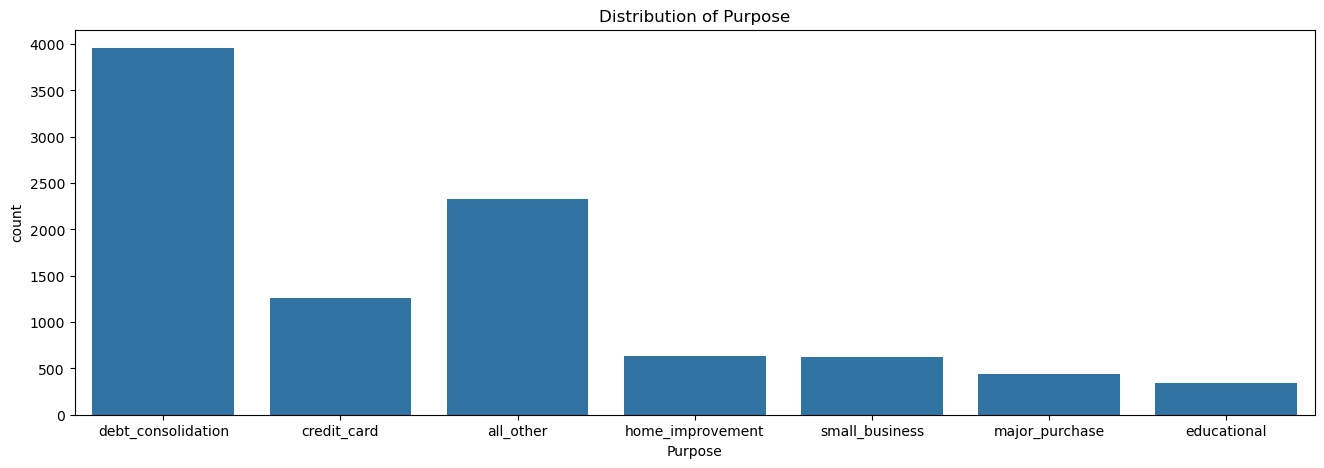

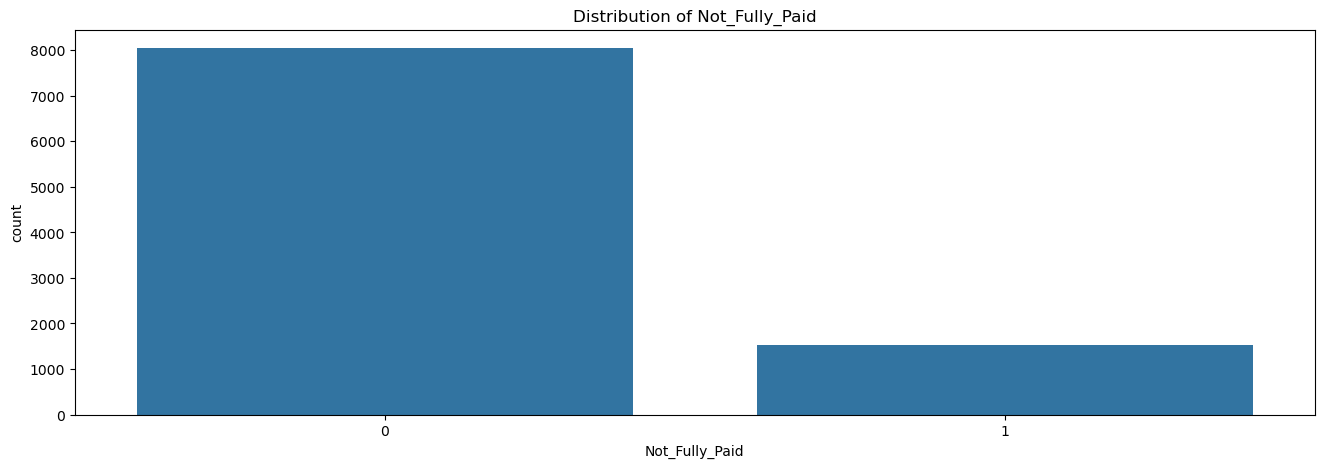

In [20]:
for col in cat_cols:
    plt.figure(figsize=(16,5))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()

### *Comparing Numerical Features to the Target Feature Using Boxplot*

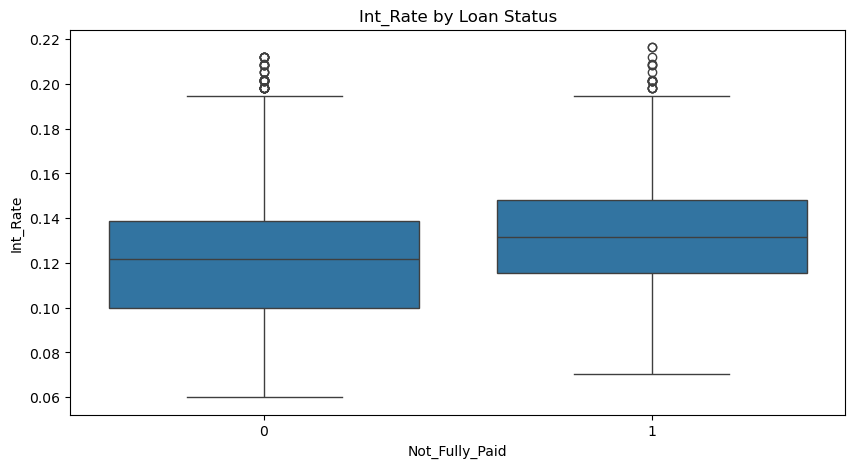

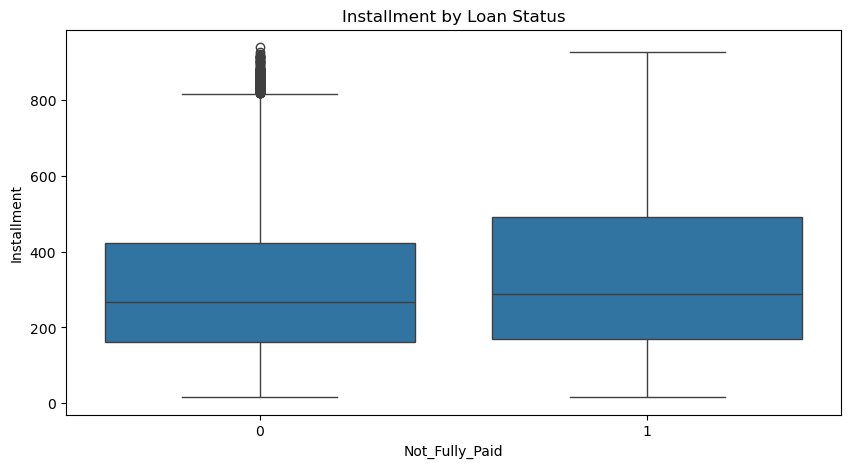

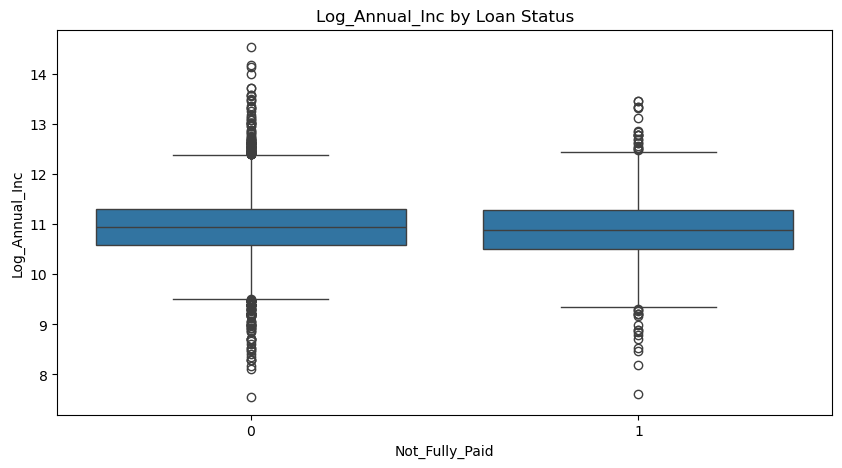

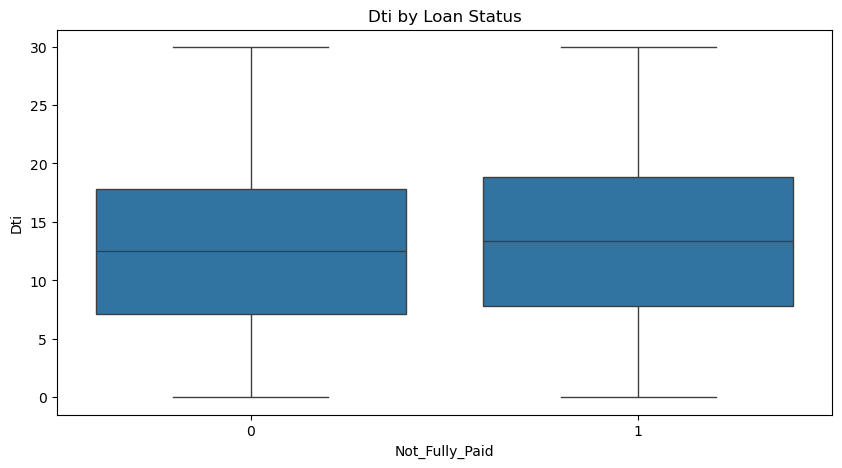

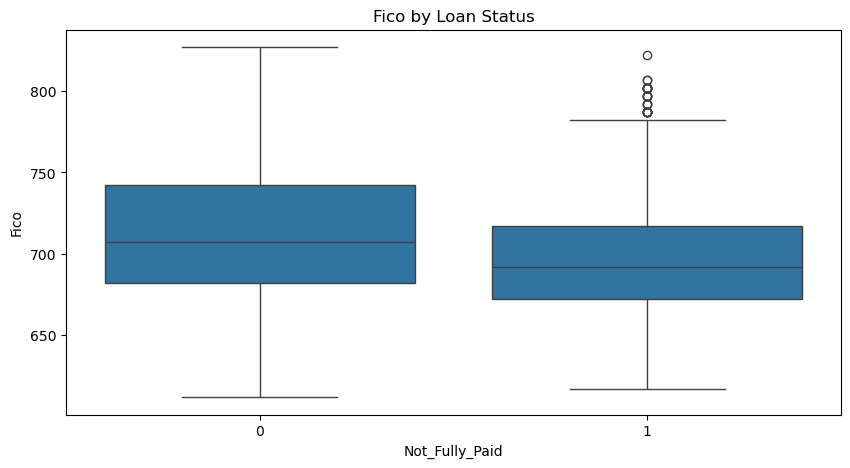

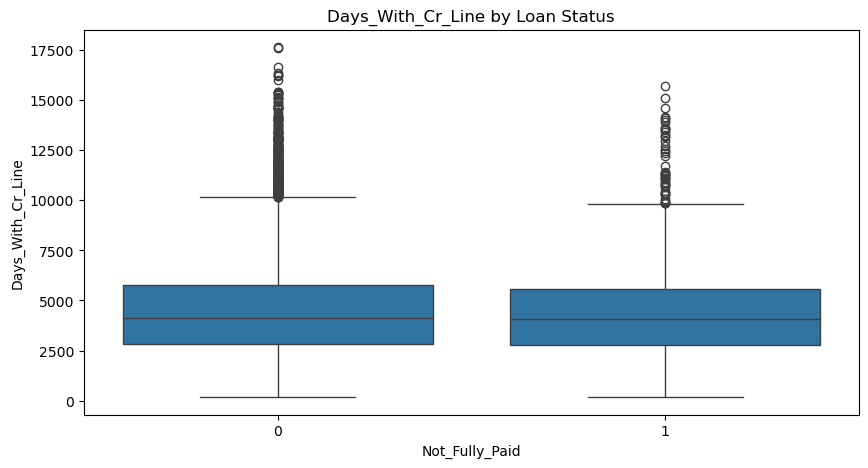

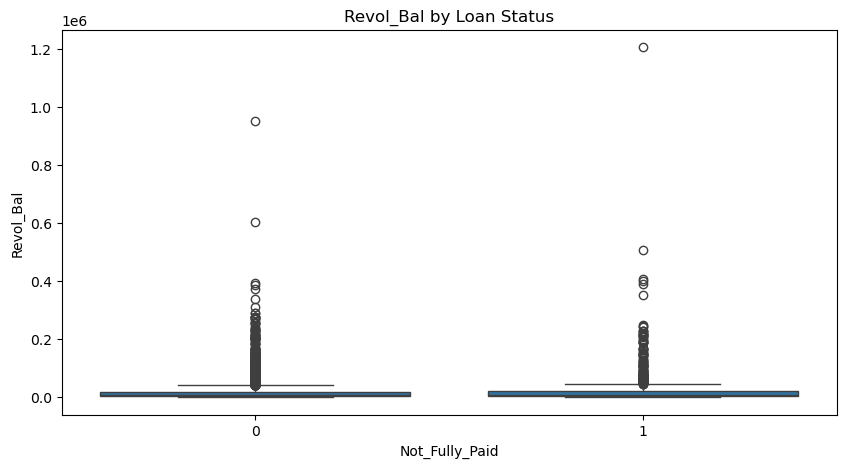

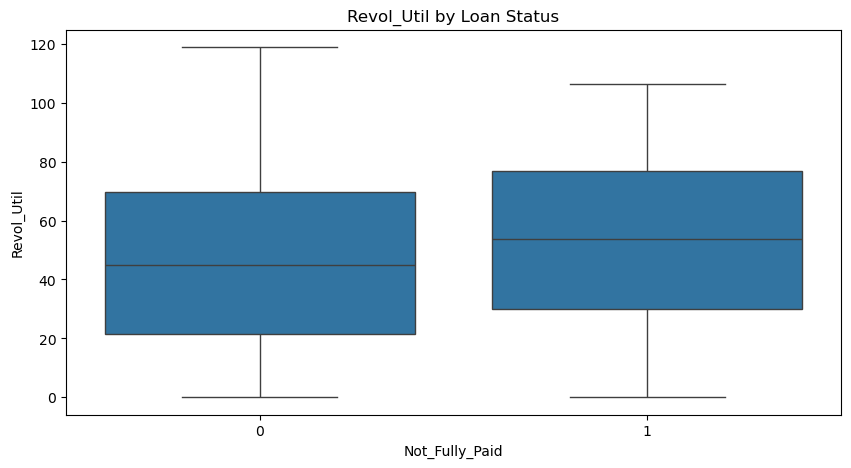

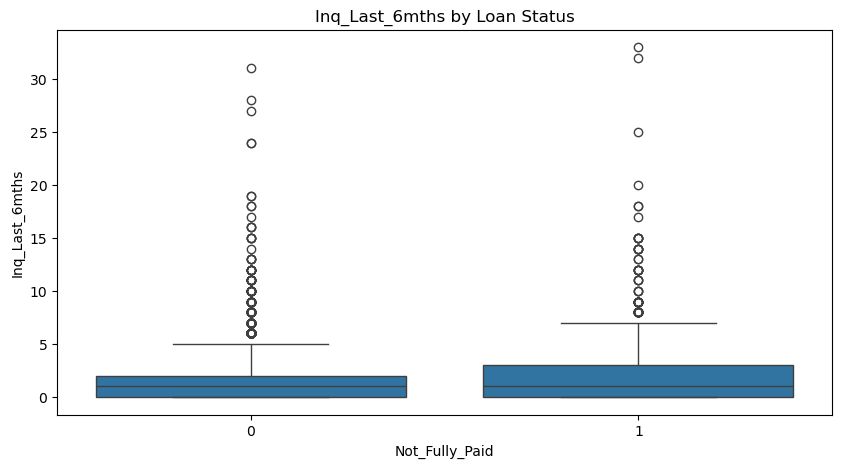

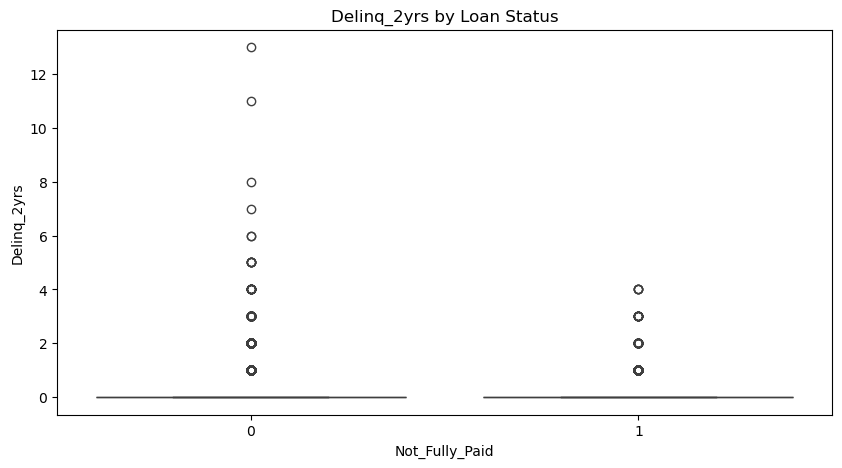

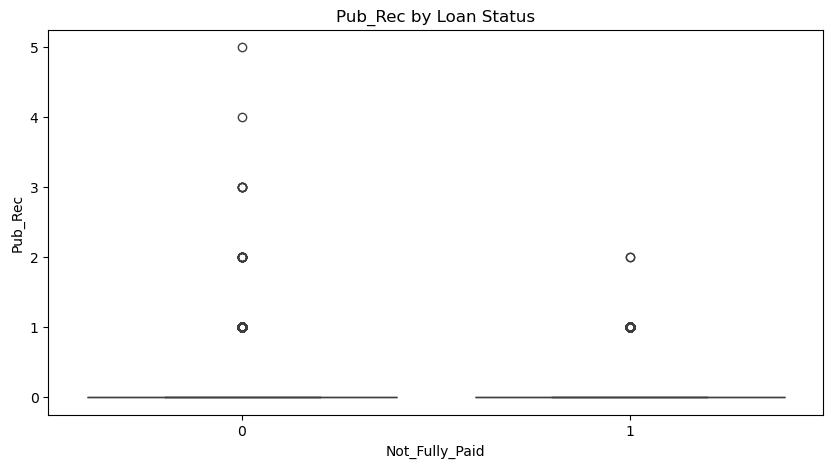

In [21]:
for col in num_cols:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df, x='Not_Fully_Paid', y=col)
    plt.title(f'{col} by Loan Status')
    plt.show()

### *Z-score Analysis for the Numerical Features*

In [22]:
z_scores = stats.zscore(df[num_cols])
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).all(axis=1)
print(f"Number of outliers: {outliers.sum()}")

Number of outliers: 0


### *Comparing Categorical Features to the Target Feature*

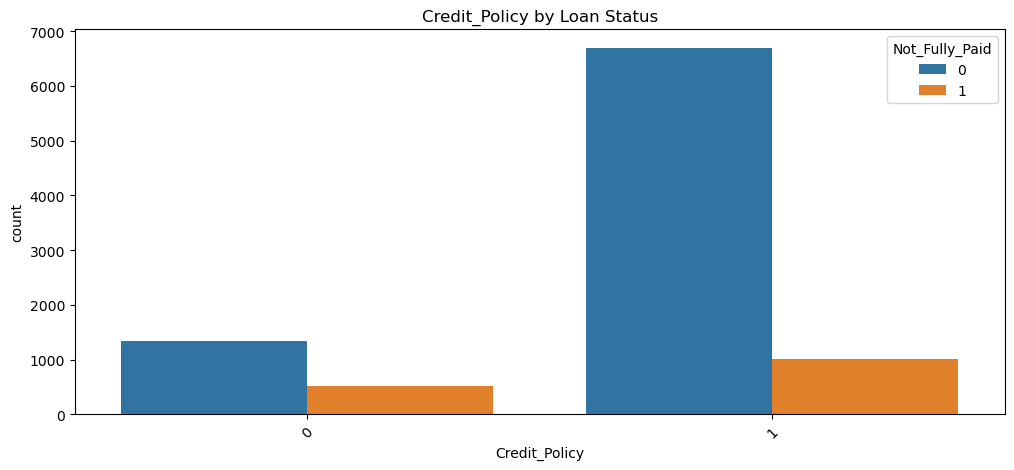

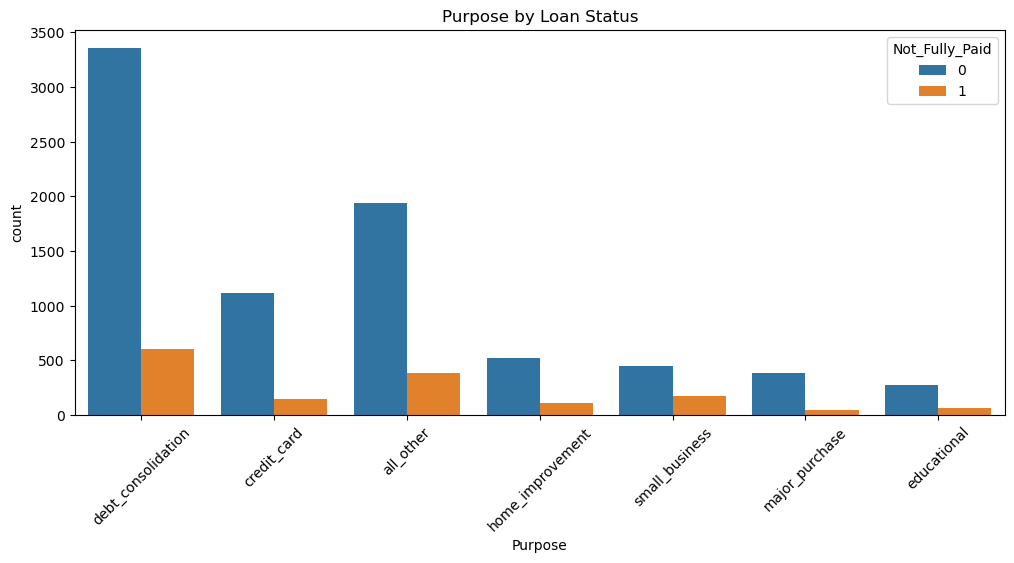

In [23]:
for col in ['Credit_Policy','Purpose']:
    plt.figure(figsize=(12,5))
    sns.countplot(data=df, x=col, hue='Not_Fully_Paid')
    plt.title(f'{col} by Loan Status')
    plt.xticks(rotation=45)
    plt.show()

### *Convert Days_With_Cr_Line to Years*

In [24]:
df['Credit_History_Years'] = df['Days_With_Cr_Line'] / 365

### *Analyze Days_With_Cr_Line Relationship with the Target Feature*

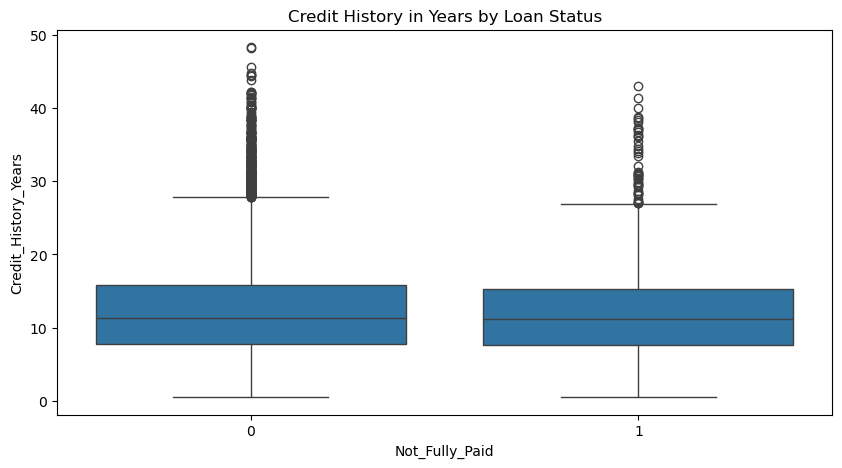

In [25]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Not_Fully_Paid', y='Credit_History_Years')
plt.title('Credit History in Years by Loan Status')
plt.show()

# **Data Preprocessing**

### *Convert the Categorical Column, Purpose, into Numerical Column*

In [26]:
df['Purpose'] = df['Purpose'].map({'debt_consolidation':0,'credit_card':1,'all_other':2,'home_improvement':3,'small_business':4,'major_purchase':5,'educational':6})

In [27]:
df.head(5)

,Credit_Policy,Purpose,Int_Rate,Installment,Log_Annual_Inc,Dti,Fico,Days_With_Cr_Line,Revol_Bal,Revol_Util,Inq_Last_6mths,Delinq_2yrs,Pub_Rec,Not_Fully_Paid,Credit_History_Years
0,1,0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,15.451941
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,7.561644
2,1,0,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,12.904110
3,1,0,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,7.397146
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,11.139726


### *Correlation Matrix*

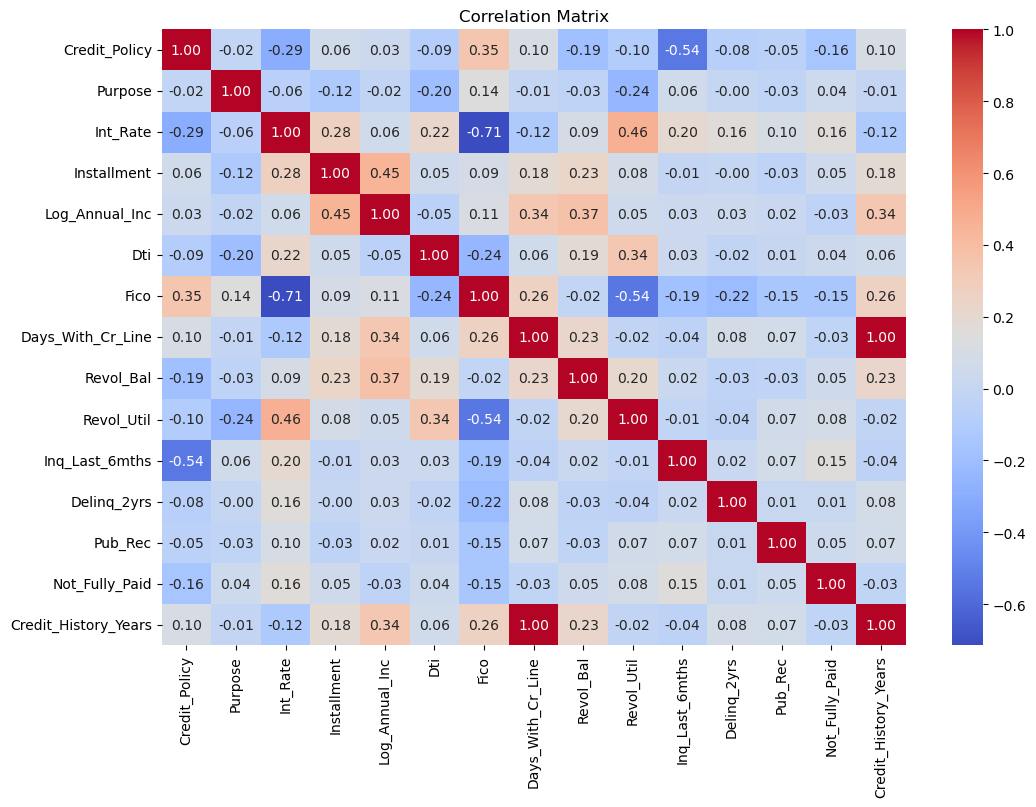

In [28]:
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# **Feature Engineering**

#### 1. *Payment Burden Ratio (monthly payment to income ratio)*

In [29]:
df['Payment_Burden_Ratio'] = df['Installment'] / (np.exp(df['Log_Annual_Inc']) / 12)

#### 2. *Risk Score Composite (weighted combination of risk factors)*

##### *Normalizing key Features for Risk Score Composite which are, Fico, Dti and Int_Rate*

In [30]:
df['Fico_Norm'] = (df['Fico']-300)/(850-300)
df['Dti_Norm'] = df['Dti']/100
df['Int_Rate_Norm'] = df['Int_Rate']

##### *Calculation for Risk Score (Higher Score means More Riskier)*

In [31]:
weights = {
    'Fico': 0.3,
    'Dti': 0.2,
    'Int_Rate': 0.2,
    'Inq_Last_6mths': 0.1,
    'Delinq_2yrs': 0.1,
    'Pub_Rec': 0.1
}

In [32]:
df['Risk_Score_Composite'] = (
    (1 - df['Fico_Norm']) * weights['Fico'] +
    df['Dti_Norm'] * weights['Dti'] +
    df['Int_Rate_Norm'] * weights['Int_Rate'] +
    (df['Inq_Last_6mths'] / 10) * weights['Inq_Last_6mths'] +
    (df['Delinq_2yrs'] / 5) * weights['Delinq_2yrs'] +
    (df['Pub_Rec'] / 5) * weights['Pub_Rec']
)

##### *Scaling Risk Score from 0-100 range*

In [33]:
df['Risk_Score_Composite'] = df['Risk_Score_Composite'] * 100

### **Show the New Features Engineered**

In [34]:
df.head(5)

,Credit_Policy,Purpose,Int_Rate,Installment,Log_Annual_Inc,Dti,Fico,Days_With_Cr_Line,Revol_Bal,Revol_Util,Inq_Last_6mths,Delinq_2yrs,Pub_Rec,Not_Fully_Paid,Credit_History_Years,Payment_Burden_Ratio,Fico_Norm,Dti_Norm,Int_Rate_Norm,Risk_Score_Composite
0,1,0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,15.451941,0.117049,0.794545,0.1948,0.1189,12.437636
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,7.561644,0.042133,0.740000,0.1429,0.1071,12.800000
2,1,0,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,12.904110,0.137573,0.694545,0.1163,0.1357,15.203636
3,1,0,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,7.397146,0.022919,0.749091,0.0810,0.1008,12.163273
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,11.139726,0.015285,0.667273,0.1497,0.1426,17.827818


### *Comparing the New Features Engineered to the Target Variable with Boxplot*

In [35]:
New_Features = ['Payment_Burden_Ratio', 'Risk_Score_Composite']

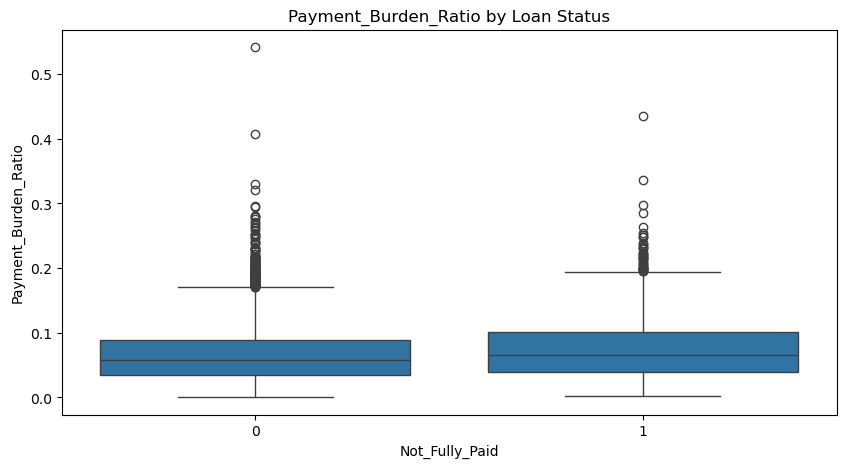

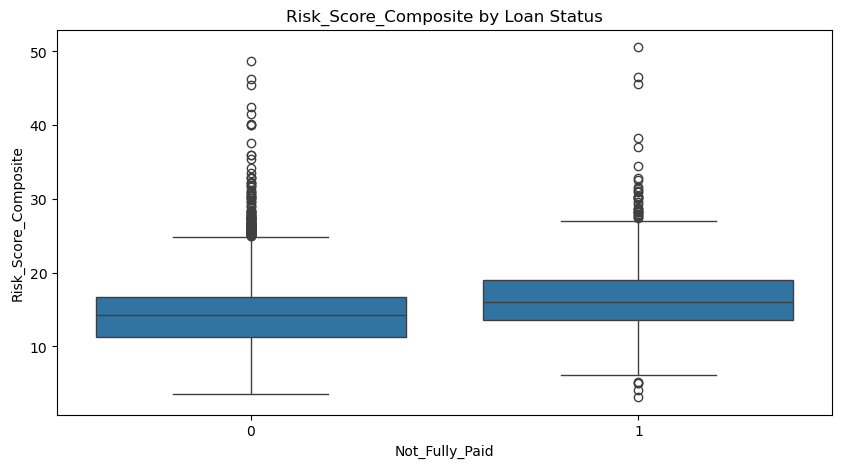

In [36]:
for feat in New_Features:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df, x='Not_Fully_Paid', y=feat)
    plt.title(f'{feat} by Loan Status')
    plt.show()

# **Feature Engineering Documentation and the Reason Behind it**

## **Payment Burden Ratio**

##### *Payment Burden Ratio, this metric is featured to help the GhanaLoanConnect as a lender to evaluate the borrowers’ ability to manage their debt payment relative to their income. The payment burden ratio suggest that high payment would not be a problem for a borrower with a higher income.* 

##### **Reason Behind it Chosen**:*The payment burden ratio would inform GhanaLoanConnect that a borrower with a higher PBR would risk of default since the borrower is spending a large portion of its income on debt.*

## **Risk Score Composite**

##### *Risk Score Composite, this metric is featured to enable GhanaLoanConnect to aggregate other risk-related factors about their borrowers into one score. It was created by combining the key features like (Dti,Fico and Int_Rate).*

##### **Reason Behind it Chosen**:*The Risk Score Composite would enable GhanaLoanConnect to quickly assesses a borrower’s overall risk level. A higher risk score would indicate a trustworthy borrower, while a low score proves a higher risk of default. This informs GhanaLoanConnect to whether approve the loan or reject or adjust the loan amount or loan terms.*

# **Store Feature Matrix in X and Response (Target) in y**

In [37]:
X = df.drop('Not_Fully_Paid',axis=1)
y = df['Not_Fully_Paid']

# **Splitting the Dataset into Train Set and Test Set**

In [38]:
from sklearn.model_selection import train_test_split

## Splitting the Dataset

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)


### **Handling the Imbalaced Target Variable**

### Visualise the Target Variable

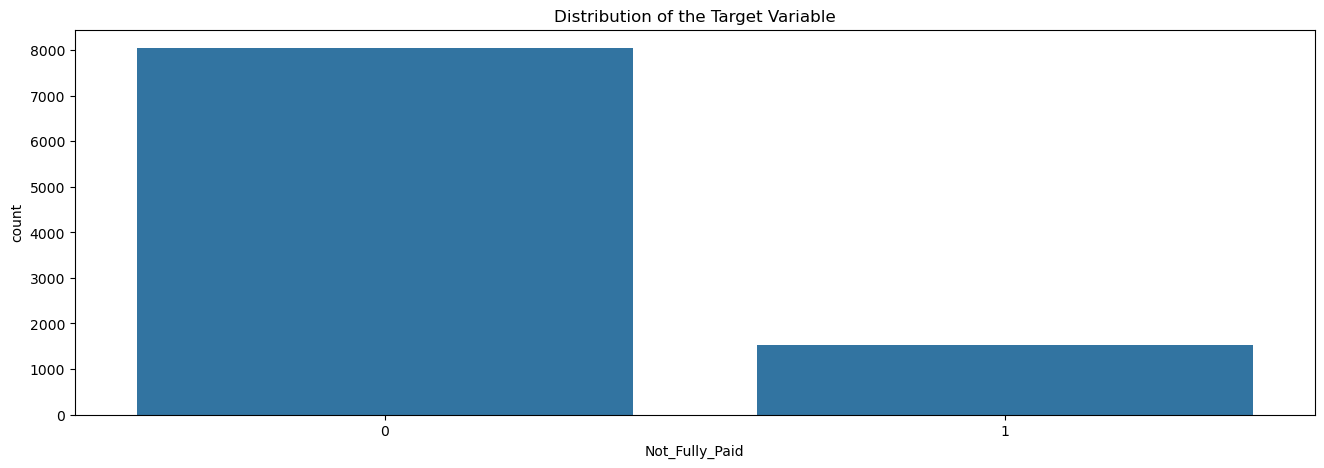

In [40]:
plt.figure(figsize=(16,5))
sns.countplot(data=df, x='Not_Fully_Paid')
plt.title('Distribution of the Target Variable')
plt.show()

### **Oversampling**

In [41]:
from imblearn.over_sampling import SMOTE

In [42]:
X_res, y_res = SMOTE().fit_resample(X,y)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20,
                                                random_state=42)

In [44]:
X.shape

(9578, 19)

In [45]:
y.shape

(9578,)

### **Logistic Regression**

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
lr = LogisticRegression()

In [48]:
lr.fit(X_train,y_train)

LogisticRegression()

In [49]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [50]:
from sklearn.metrics import roc_curve,roc_auc_score

In [51]:
y_pred1 = lr.predict(X_test)

In [52]:
accuracy_score(y_test,y_pred1)

0.6037911746426352

In [53]:
precision_score(y_test,y_pred1)

0.6024922118380063

In [54]:
recall_score(y_test,y_pred1)

0.6028678304239401

In [55]:
f1_score(y_test,y_pred1)

0.602679962605173

In [56]:
roc_auc_score(y_test,y_pred1)

0.6037883142206442

## **Decision Tree Classifier**

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
dc = DecisionTreeClassifier()

In [59]:
dc.fit(X_train,y_train)

DecisionTreeClassifier()

In [60]:
y_pred2 = dc.predict(X_test)

In [61]:
accuracy_score(y_test,y_pred2)

0.776569297700435

In [62]:
precision_score(y_test,y_pred2)

0.7610619469026548

In [63]:
recall_score(y_test,y_pred2)

0.8042394014962594

In [64]:
f1_score(y_test,y_pred2)

0.7820551682327979

In [65]:
roc_auc_score(y_test,y_pred2)

0.7766550167332598

## **Random Forest Classifier**

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf = RandomForestClassifier()

In [68]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [69]:
y_pred3 = rf.predict(X_test)

In [70]:
accuracy_score(y_test,y_pred3)

0.8620261031696707

In [71]:
precision_score(y_test,y_pred3)

0.8737113402061856

In [72]:
recall_score(y_test,y_pred3)

0.8453865336658354

In [73]:
f1_score(y_test,y_pred3)

0.8593155893536122

In [74]:
roc_auc_score(y_test,y_pred3)

0.8619745555565856

## **Gradient Boosting Classifier**

In [75]:
from sklearn.ensemble import GradientBoostingClassifier

In [76]:
gb = GradientBoostingClassifier()

In [77]:
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [78]:
y_pred4 = gb.predict(X_test)

In [79]:
accuracy_score(y_test,y_pred4)

0.7663144810441268

In [80]:
precision_score(y_test,y_pred4)

0.7855227882037533

In [81]:
recall_score(y_test,y_pred4)

0.7306733167082294

In [82]:
f1_score(y_test,y_pred4)

0.7571059431524548

In [83]:
roc_auc_score(y_test,y_pred4)

0.7662040685152052

## **Support Vector Machines**

In [84]:
from sklearn.svm import SVC

In [85]:
sv = SVC()

In [86]:
sv.fit(X_train,y_train)

SVC()

In [87]:
y_pred5 = sv.predict(X_test)

In [88]:
accuracy_score(y_test,y_pred5)

0.5323182100683654

In [89]:
precision_score(y_test,y_pred5)

0.5368577810871183

In [90]:
recall_score(y_test,y_pred5)

0.449501246882793

In [91]:
f1_score(y_test,y_pred5)

0.48931116389548696

In [92]:
roc_auc_score(y_test,y_pred5)

0.5320616519420162

## **ROC CURVE and AUC Analysis**

In [93]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [94]:
scaler = StandardScaler()

In [95]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [96]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [97]:
y_pred_prob = logreg.predict_proba(X_test_scaled)[:, 1]

In [98]:
from sklearn.metrics import roc_curve,roc_auc_score, auc

In [99]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

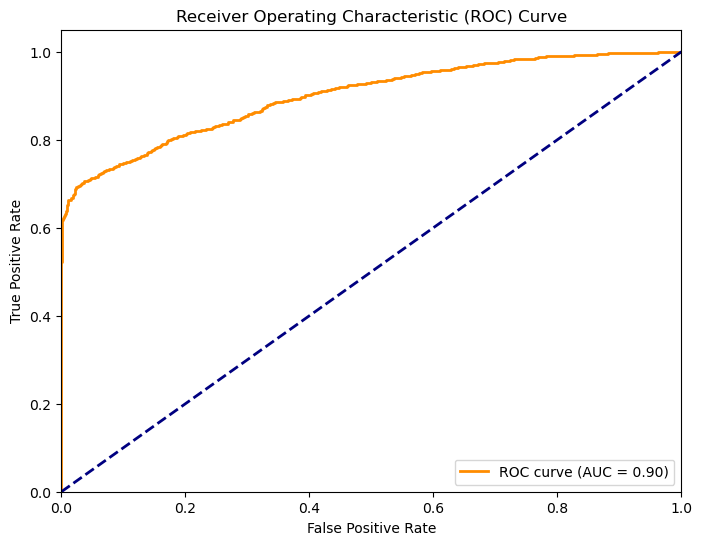

In [100]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [101]:
print(f"AUC Score: {roc_auc:.4f}")

AUC Score: 0.8997


## **Save the Data**

In [102]:
final_data = pd.DataFrame({'Models':['LR','DC','RF','GB','SV'],
                               'ACC':[accuracy_score(y_test,y_pred1)*100,
                                      accuracy_score(y_test,y_pred2)*100,
                                      accuracy_score(y_test,y_pred3)*100,
                                      accuracy_score(y_test,y_pred4)*100,
                                      accuracy_score(y_test,y_pred5)*100
                                     ]})

In [103]:
final_data

,Models,ACC
0,LR,60.379117
1,DC,77.656930
2,RF,86.202610
3,GB,76.631448
4,SV,53.231821


In [104]:
rf1 = RandomForestClassifier()
rf1.fit(X_res,y_res)

RandomForestClassifier()

In [105]:
import joblib

In [106]:
joblib.dump(rf1,"Loan_Approval_Model")

['Loan_Approval_Model']

In [107]:
Model = joblib.load("Loan_Approval_Model")

In [108]:
Pred = Model.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

In [109]:
if Pred ==0:
    print("Paid")
else:
    print("Yet_to_Pay")

Yet_to_Pay


In [ ]:
from tkinter import *
import joblib
import numpy as np


Model = joblib.load('Loan_Approval_Model')

def show_entry_fields():
    
    Credit_Policy = float(e1.get())
    Purpose = float(e2.get())
    Int_Rate = float(e3.get())
    Installment = float(e4.get())
    Log_Annual_Inc = float(e5.get())
    Dti = float(e6.get())
    Fico = float(e7.get())

    Days_With_Cr_Line = float(e8.get())

    Revol_Bal = float(e9.get())
    Revol_Util = float(e10.get())

    Inq_Last_6mths = float(e11.get())
    Delinq_2yrs = float(e12.get())
    Pub_Rec = float(e13.get())

    
    Credit_History_Years = Days_With_Cr_Line / 365

    Fico_Norm = (Fico - 300) / (850 - 300)
    Dti_Norm = Dti / 100
    Int_Rate_Norm = Int_Rate

    weights = {
        'Fico': 0.3,
        'Dti': 0.2,
        'Int_Rate': 0.2,
        'Inq_Last_6mths': 0.1,
        'Delinq_2yrs': 0.1,
        'Pub_Rec': 0.1
    }

    Risk_Score_Composite = (
        (1 - Fico_Norm) * weights['Fico'] +
        Dti_Norm * weights['Dti'] +
        Int_Rate_Norm * weights['Int_Rate'] +
        (Inq_Last_6mths / 10) * weights['Inq_Last_6mths'] +
        (Delinq_2yrs / 5) * weights['Delinq_2yrs'] +
        (Pub_Rec / 5) * weights['Pub_Rec']
    )
    Risk_Score_Composite = Risk_Score_Composite * 100

    Annual_Inc = np.exp(Log_Annual_Inc)
    Monthly_Inc = Annual_Inc / 12
    Payment_Burden_Ratio = Installment / Monthly_Inc

    
    input_features = [
        Credit_Policy, Purpose, Int_Rate, Installment, Log_Annual_Inc, Dti, Fico,
        Days_With_Cr_Line, Revol_Bal, Revol_Util, Inq_Last_6mths, Delinq_2yrs, Pub_Rec,
        Credit_History_Years, Payment_Burden_Ratio, Fico_Norm, Dti_Norm, Int_Rate_Norm, Risk_Score_Composite
    ]

    
    y_pred = Model.predict([input_features])

    result = []
    if y_pred == 0:
        result.append("Paid")
    else:
        result.append("Yet_to_Pay")

    print("##############")
    print("Loan Approval System", result)
    print("##############")

    
    Label(master, text=result).grid(row=15)


master = Tk()
master.title("Loan Approval System")

label = Label(master, text="Loan Approval System", bg="black", fg="white", width=30).grid(row=0, columnspan=2)

Label(master, text="Enter value of Credit_Policy").grid(row=1, column=0)
Label(master, text="Enter value of Purpose").grid(row=2, column=0)
Label(master, text="Enter value of Int_Rate").grid(row=3, column=0)
Label(master, text="Enter value of Installment").grid(row=4, column=0)
Label(master, text="Enter value of Log_Annual_Inc").grid(row=5, column=0)
Label(master, text="Enter value of Dti").grid(row=6, column=0)
Label(master, text="Enter value of Fico").grid(row=7, column=0)
Label(master, text="Enter value of Days_With_Cr_Line").grid(row=8, column=0)
Label(master, text="Enter value of Revol_Bal").grid(row=9, column=0)
Label(master, text="Enter value of Revol_Util").grid(row=10, column=0)
Label(master, text="Enter value of Inq_Last_6mths").grid(row=11, column=0)
Label(master, text="Enter value of Delinq_2yrs").grid(row=12, column=0)
Label(master, text="Enter value of Pub_Rec").grid(row=13, column=0)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)

Button(master, text='Predict', command=show_entry_fields).grid(row=14, column=0, columnspan=2)


Label(master, text="Final Prediction from the Model - Loan Approval").grid(row=15, column=0, columnspan=2)

master.mainloop()